In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel("datasets_140442_330428_Data_Train.xlsx")

In [3]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [4]:
data.shape

(10683, 11)

In [5]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
data.dropna(axis=0,inplace=True)

In [7]:
data.shape

(10682, 11)

In [8]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [10]:
data['journey_day']=pd.to_datetime(data['Date_of_Journey'],format='%d/%m/%Y').dt.day
data['journey_month']=pd.to_datetime(data['Date_of_Journey'],format='%d/%m/%Y').dt.month
data['journey_year']=pd.to_datetime(data['Date_of_Journey'],format='%d/%m/%Y').dt.year
data.drop('Date_of_Journey',axis=1,inplace=True)

In [11]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [12]:
data['dep_time_hr']=pd.to_datetime(data['Dep_Time'],format="%H:%M").dt.hour
data['dep_time_min']=pd.to_datetime(data['Dep_Time'],format="%H:%M").dt.minute
data.drop('Dep_Time',axis=1,inplace=True)

In [13]:
from datetime import datetime

In [14]:
data["Arrival_hour"] = pd.to_datetime(data['Arrival_Time']).dt.hour
data["Arrival_min"] = pd.to_datetime(data['Arrival_Time']).dt.minute
data.drop("Arrival_Time",axis=1,inplace=True)

In [15]:
data.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,dep_time_hr,dep_time_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30


In [16]:
data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [17]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,journey_year,dep_time_hr,dep_time_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,2019,9,25,4,25


In [18]:
# h = data['Duration'].str.extract('(\d+)h', expand=False).astype(float) * 60
# m = data['Duration'].str.extract('(\d+)m', expand=False).astype(float)
# data['new'] = h.add(m, fill_value=0).astype(int).astype(str) + 'm'
# data.drop('Duration',axis=1,inplace=True)

In [19]:
h = data['Duration'].str.extract('(\d+)h', expand=False).astype(float) * 60
m = data['Duration'].str.extract('(\d+)m', expand=False).astype(float)
data['new'] = h.add(m, fill_value=0).astype(int).astype(int) 
data.drop('Duration',axis=1,inplace=True)

In [20]:
data.head(3)

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,journey_year,dep_time_hr,dep_time_min,Arrival_hour,Arrival_min,new
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,4,25,1140


In [21]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [22]:
airline=pd.get_dummies(data['Airline'],drop_first=True)
source=pd.get_dummies(data['Source'],drop_first=True)
destination=pd.get_dummies(data['Destination'],drop_first=True)
# data.drop(['Airline','Source','Destination'],axis=1,inplace=True)
data=pd.concat([data,airline,source,destination],axis=1)
data.head(3)
# airline.head(3)

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,journey_year,dep_time_hr,dep_time_min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,...,0,0,1,0,0,1,0,0,0,0


In [23]:
data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [24]:
data.head(3)

,Total_Stops,Price,journey_day,journey_month,journey_year,dep_time_hr,dep_time_min,Arrival_hour,Arrival_min,new,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,non-stop,3897,24,3,2019,22,20,1,10,170,...,0,0,0,0,0,0,0,0,0,1
1,2 stops,7662,1,5,2019,5,50,13,15,445,...,0,0,0,1,0,0,0,0,0,0
2,2 stops,13882,9,6,2019,9,25,4,25,1140,...,0,0,1,0,0,1,0,0,0,0


In [25]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [26]:
# data.replace({'non-stop':0,'1 stop ':1,'2 stops':2,'3 stops':3,'4 stops ':4},inplace=True)
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [27]:
data['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [28]:
data.head(3)

,Total_Stops,Price,journey_day,journey_month,journey_year,dep_time_hr,dep_time_min,Arrival_hour,Arrival_min,new,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,2019,22,20,1,10,170,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,445,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,1140,...,0,0,1,0,0,1,0,0,0,0


In [29]:
data.shape

(10682, 30)

In [30]:
# Index(['Total_Stops', 'journey_day', 'journey_month', 'journey_year',
#        'dep_time_hr', 'dep_time_min', 'Arrival_hour', 'Arrival_min', 'new',
#        'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
#        'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
#        'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata',
#        'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi']

In [31]:
data.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'journey_year',
       'dep_time_hr', 'dep_time_min', 'Arrival_hour', 'Arrival_min', 'new',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

In [32]:
data['Trujet'].value_counts()

0    10681
1        1
Name: Trujet, dtype: int64

In [33]:
x=data.drop("Price",axis=1)
y=data['Price']

In [34]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10682 non-null  int64
 1   journey_day                        10682 non-null  int64
 2   journey_month                      10682 non-null  int64
 3   journey_year                       10682 non-null  int64
 4   dep_time_hr                        10682 non-null  int64
 5   dep_time_min                       10682 non-null  int64
 6   Arrival_hour                       10682 non-null  int64
 7   Arrival_min                        10682 non-null  int64
 8   new                                10682 non-null  int32
 9   Air India                          10682 non-null  uint8
 10  GoAir                              10682 non-null  uint8
 11  IndiGo                             10682 non-null  uint8
 12  Jet Airways       

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

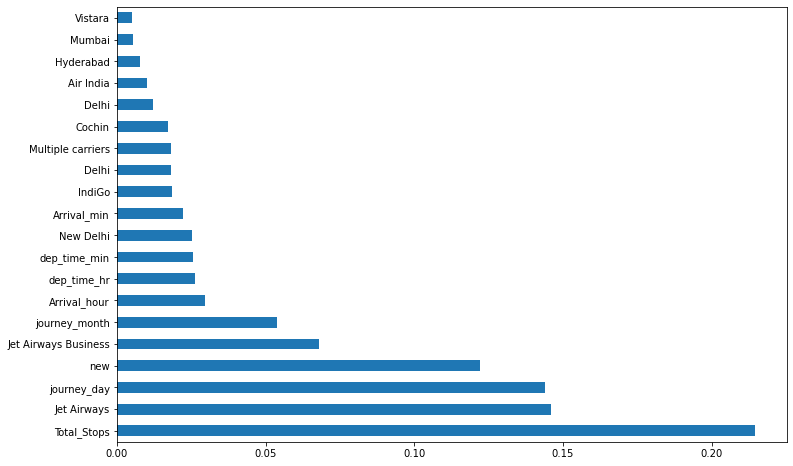

In [37]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

<IPython.core.display.Javascript object>

In [39]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [40]:

y_pred = reg_rf.predict(X_test)

In [41]:
reg_rf.score(X_train, y_train)

0.9518175088181633

In [42]:
reg_rf.score(X_test, y_test)

0.8197617397032805

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

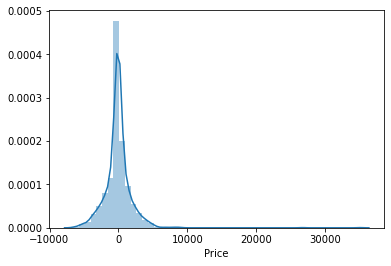

In [43]:
sns.distplot(y_test-y_pred)
plt.show()


In [44]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1154.781044789376
MSE: 3886307.5202867994
RMSE: 1971.3719893228674


In [45]:
metrics.r2_score(y_test, y_pred)

0.8197617397032805

In [47]:
sample=pd.read_excel("datasets_140442_330428_Sample_submission.xlsx")

In [48]:
sample.head()

,Price
0,15998
1,16612
2,25572
3,25778
4,16934


In [52]:
test=pd.read_csv("test_mine")
test.drop("Unnamed: 0",axis=1,inplace=True)
test.head()

,Total_Stops,journey_day,journey_month,journey_year,dep_time_hr,dep_time_min,Arrival_hour,Arrival_min,new,Air India,...,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi.1,Hyderabad,Kolkata.1,New Delhi,trujet
0,1,6,6,2019,17,30,4,25,655,0,...,0,1,0,0,1,0,0,0,0,0
1,1,12,5,2019,6,20,10,20,240,0,...,0,0,1,0,0,0,0,0,0,0
2,1,21,5,2019,19,15,19,0,1425,0,...,0,1,0,0,1,0,0,0,0,0
3,1,21,5,2019,8,0,21,0,780,0,...,0,1,0,0,1,0,0,0,0,0
4,0,24,6,2019,23,55,2,45,170,0,...,0,0,0,0,0,1,0,0,0,0


In [65]:
pred = reg_rf.predict(test)
pred=pd.DataFrame(pred)

In [67]:
pred.columns=['Price']

In [68]:
pred.head()

,Price
0,12982.600333
1,4641.790000
2,16253.891667
3,13162.385000
4,3865.420000


In [69]:
pred.to_csv("kaggle_submission")